In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset3/d2.csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import tensorflow as tf

# List all physical devices
physical_devices = tf.config.list_physical_devices()
print("All Physical Devices:", physical_devices)

# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Set memory growth for available GPUs
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Memory growth set for {gpu.name}")
    except RuntimeError as e:
        print("Error setting memory growth:", e)
else:
    print("No GPUs available.")

All Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Memory growth set for /physical_device:GPU:0
Memory growth set for /physical_device:GPU:1


In [26]:
df=pd.read_csv('/kaggle/input/dataset3/d2.csv')

In [27]:
df

Machine  Temps ouverture (heures)  Arret planifie (heures)  \
0        M1                        15                 1.156961   
1        M2                        15                 1.211035   
2        M3                        15                 2.136547   
3        M4                        16                 1.359729   
4        M1                        16                 1.540807   
..      ...                       ...                      ...   
995      M4                        15                 1.923029   
996      M1                        15                 1.115517   
997      M2                        15                 2.235595   
998      M3                        15                 1.090204   
999      M4                        17                 2.113038   

     Duree de panne (heures)  Ecart de cadence (heures)  \
0                   1.099763                   0.662674   
1                   0.855025                   0.317592   
2                   1.071865                   0.429608   
3                   1.190878                   0.409812   
4                   0.630224                   0.180200   
..                       ...                        ...   
995                 1.112017                   0.341187   
996                 0.727697                   0.324885   
997                 1.189442                   0.235546   
998                 1.094100                   0.649350   
999                 1.320722                   0.558488   

     Nombre de piece bonne  Cadence de production (piees/minute)  
0                      757                                    60  
1                      695                                    51  
2                      872                                    64  
3                      653                                    53  
4                      648                                    51  
..                     ...                                   ...  
995                    857                                    54  
996                    695                                    50  
997                    876                                    59  
998                    681                                    57  
999                    777                                    59  

[1000 rows x 7 columns]

In [28]:
df.dtypes

Machine                                  object
Temps ouverture (heures)                  int64
Arret planifie (heures)                 float64
Duree de panne (heures)                 float64
Ecart de cadence (heures)               float64
Nombre de piece bonne                     int64
Cadence de production (piees/minute)      int64
dtype: object

In [29]:
df.describe()

Temps ouverture (heures)  Arret planifie (heures)  \
count               1000.000000              1000.000000   
mean                  16.040000                 1.761091   
std                    0.813057                 0.441670   
min                   15.000000                 1.000078   
25%                   15.000000                 1.371877   
50%                   16.000000                 1.760350   
75%                   17.000000                 2.150677   
max                   17.000000                 2.498946   

       Duree de panne (heures)  Ecart de cadence (heures)  \
count              1000.000000                1000.000000   
mean                  1.004005                   0.400539   
std                   0.284758                   0.173728   
min                   0.501277                   0.100648   
25%                   0.761208                   0.251688   
50%                   1.004638                   0.397701   
75%                   1.254102                   0.547564   
max                   1.498743                   0.698356   

       Nombre de piece bonne  Cadence de production (piees/minute)  
count            1000.000000                           1000.000000  
mean              743.682000                             57.298000  
std                86.111754                              4.362824  
min               600.000000                             50.000000  
25%               665.750000                             53.000000  
50%               739.000000                             57.000000  
75%               818.000000                             61.000000  
max               899.000000                             64.000000

In [30]:
df['Temps_Fonctionnement'] = df['Temps ouverture (heures)'] - df['Arret planifie (heures)'] - df['Duree de panne (heures)']


In [31]:
df['Temps_Requis'] = df['Temps_Fonctionnement'] - df['Ecart de cadence (heures)']

In [32]:
df['Temps_Utile'] = df['Nombre de piece bonne'] / df['Cadence de production (piees/minute)']  # This gives you the time in minutes
df['Temps_Utile'] = df['Temps_Utile'] / 60  # Convert minutes to hours

In [33]:
df['TRS'] = (df['Temps_Utile'] / df['Temps_Fonctionnement']) * 100

In [34]:
df

Machine  Temps ouverture (heures)  Arret planifie (heures)  \
0        M1                        15                 1.156961   
1        M2                        15                 1.211035   
2        M3                        15                 2.136547   
3        M4                        16                 1.359729   
4        M1                        16                 1.540807   
..      ...                       ...                      ...   
995      M4                        15                 1.923029   
996      M1                        15                 1.115517   
997      M2                        15                 2.235595   
998      M3                        15                 1.090204   
999      M4                        17                 2.113038   

     Duree de panne (heures)  Ecart de cadence (heures)  \
0                   1.099763                   0.662674   
1                   0.855025                   0.317592   
2                   1.071865                   0.429608   
3                   1.190878                   0.409812   
4                   0.630224                   0.180200   
..                       ...                        ...   
995                 1.112017                   0.341187   
996                 0.727697                   0.324885   
997                 1.189442                   0.235546   
998                 1.094100                   0.649350   
999                 1.320722                   0.558488   

     Nombre de piece bonne  Cadence de production (piees/minute)  \
0                      757                                    60   
1                      695                                    51   
2                      872                                    64   
3                      653                                    53   
4                      648                                    51   
..                     ...                                   ...   
995                    857                                    54   
996                    695                                    50   
997                    876                                    59   
998                    681                                    57   
999                    777                                    59   

     Temps_Fonctionnement  Temps_Requis  Temps_Utile       TRS  
0               12.743276     12.080601     0.210278  1.650108  
1               12.933940     12.616348     0.227124  1.756032  
2               11.791588     11.361981     0.227083  1.925808  
3               13.449393     13.039580     0.205346  1.526804  
4               13.828969     13.648769     0.211765  1.531312  
..                    ...           ...          ...       ...  
995             11.964955     11.623768     0.264506  2.210674  
996             13.156786     12.831901     0.231667  1.760815  
997             11.574963     11.339417     0.247458  2.137870  
998             12.815695     12.166345     0.199123  1.553742  
999             13.566240     13.007751     0.219492  1.617925  

[1000 rows x 11 columns]

In [35]:
df.drop(['Temps ouverture (heures)','Arret planifie (heures)','Duree de panne (heures)','Ecart de cadence (heures)','Nombre de piece bonne','Cadence de production (piees/minute)'],inplace=True,axis=1) 

In [36]:
df

Machine  Temps_Fonctionnement  Temps_Requis  Temps_Utile       TRS
0        M1             12.743276     12.080601     0.210278  1.650108
1        M2             12.933940     12.616348     0.227124  1.756032
2        M3             11.791588     11.361981     0.227083  1.925808
3        M4             13.449393     13.039580     0.205346  1.526804
4        M1             13.828969     13.648769     0.211765  1.531312
..      ...                   ...           ...          ...       ...
995      M4             11.964955     11.623768     0.264506  2.210674
996      M1             13.156786     12.831901     0.231667  1.760815
997      M2             11.574963     11.339417     0.247458  2.137870
998      M3             12.815695     12.166345     0.199123  1.553742
999      M4             13.566240     13.007751     0.219492  1.617925

[1000 rows x 5 columns]

# Stadarize our data 

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile', 'TRS']]=scaler.fit_transform(df[['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile', 'TRS']])

In [38]:
df


Machine  Temps_Fonctionnement  Temps_Requis  Temps_Utile       TRS
0        M1              0.384689      0.317476     0.392376  0.440082
1        M2              0.429390      0.434432     0.515914  0.514659
2        M3              0.161564      0.160598     0.515614  0.634190
3        M4              0.550239      0.526826     0.356210  0.353270
4        M1              0.639231      0.659814     0.403280  0.356444
..      ...                   ...           ...          ...       ...
995      M4              0.202210      0.217747     0.790043  0.834751
996      M1              0.481637      0.481488     0.549225  0.518026
997      M2              0.110776      0.155672     0.665023  0.783493
998      M3              0.401668      0.336194     0.310575  0.372235
999      M4              0.577634      0.519877     0.459942  0.417424

[1000 rows x 5 columns]

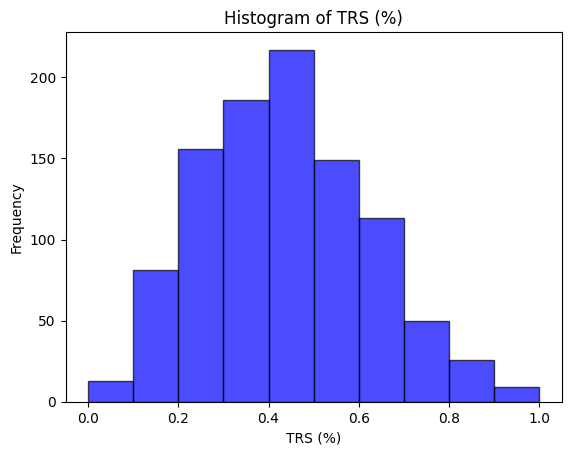

In [39]:
df['TRS'].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram of TRS (%)')
plt.xlabel('TRS (%)')
plt.ylabel('Frequency')
plt.show()

In [40]:
best_overall = df.loc[df['TRS'].idxmax()]
print(best_overall)

Machine                       M3
Temps_Fonctionnement    0.132644
Temps_Requis            0.093005
Temps_Utile             0.942772
TRS                          1.0
Name: 882, dtype: object


In [41]:
top_10_machines = df.nlargest(10, 'TRS')
print(top_10_machines)

    Machine  Temps_Fonctionnement  Temps_Requis  Temps_Utile       TRS
882      M3              0.132644      0.093005     0.942772  1.000000
812      M1              0.171624      0.125104     0.918328  0.955982
346      M3              0.066258      0.070138     0.836441  0.953152
531      M4              0.151118      0.096246     0.892159  0.947085
760      M1              0.289999      0.254436     0.963362  0.922374
360      M1              0.143642      0.116898     0.845089  0.913052
987      M4              0.170967      0.160644     0.858925  0.908176
95       M4              0.078991      0.071417     0.785887  0.902770
954      M3              0.215529      0.189488     0.882573  0.901293
647      M4              0.031896      0.046618     0.742332  0.894597


# Application Du Model ANN

In [42]:
X=df[['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile']].values
Y=df['TRS'].values

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from keras import regularizers

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history= model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2)

loss = model.evaluate(X_test, Y_test)
predictions = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1729601799.764258     101 service.cc:145] XLA service 0x7dfa9c005e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729601799.764309     101 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729601799.764315     101 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


31/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9836 

I0000 00:00:1729601801.386536     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.8753 - val_loss: 0.4683
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4079 - val_loss: 0.2731
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2374 - val_loss: 0.1684
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1503 - val_loss: 0.1130
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1026 - val_loss: 0.0818
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0751 - val_loss: 0.0631
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - val_loss: 0.0514
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0481 - val_loss: 0.0432
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0403 - val_loss: 0.0379
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0352 - val_loss: 0.0335
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316 - val_loss: 0.0306
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 - val_lo

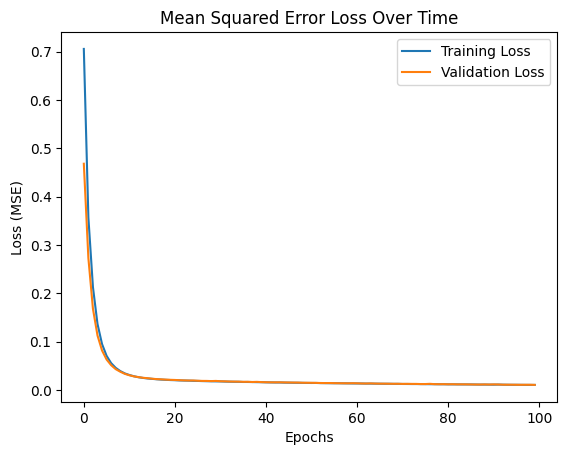

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


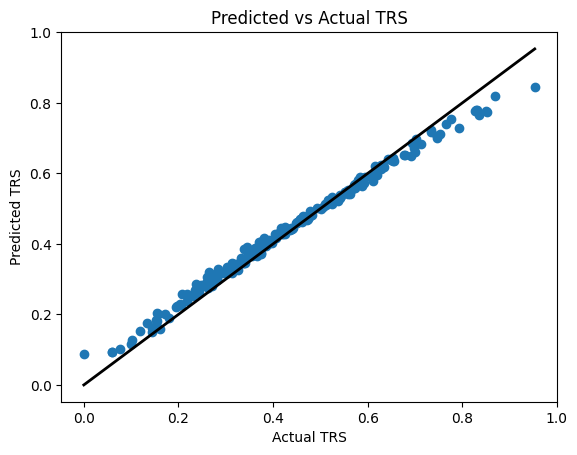

In [45]:
import matplotlib.pyplot as plt

# Plotting training and validation loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Mean Squared Error Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plotting TRS Predicted vs Actual
Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=2)
plt.title('Predicted vs Actual TRS')
plt.xlabel('Actual TRS')
plt.ylabel('Predicted TRS')
plt.show()



In [46]:
# Faire des prédictions pour l'ensemble de données complet déjà standardisé
Y_pred_all = model.predict(X)

# Ajouter les prédictions au DataFrame
df['TRS_Predit'] = Y_pred_all

# Identifier la machine avec la meilleure performance (la TRS prédite la plus élevée)
best_machine_index = df['TRS_Predit'].idxmax()
best_machine = df.loc[best_machine_index, 'Machine']
best_performance_real = df.loc[best_machine_index, 'TRS']
best_performance_pred = df.loc[best_machine_index, 'TRS_Predit']

# Afficher les résultats
print(f"La machine avec la meilleure performance est : {best_machine}")
print(f"TRS réelle: {best_performance_real}")
print(f"TRS prédite: {best_performance_pred}")

# Comparaison des résultats réels et prédits pour toutes les machines
comparison = df[['Machine', 'TRS', 'TRS_Predit']]
print(comparison)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
La machine avec la meilleure performance est : M3
TRS réelle: 0.9999999999999999
TRS prédite: 0.8964594006538391
    Machine       TRS  TRS_Predit
0        M1  0.440082    0.460655
1        M2  0.514659    0.512579
2        M3  0.634190    0.607892
3        M4  0.353270    0.372400
4        M1  0.356444    0.364244
..      ...       ...         ...
995      M4  0.834751    0.766051
996      M1  0.518026    0.516172
997      M2  0.783493    0.714090
998      M3  0.372235    0.402215
999      M4  0.417424    0.434163

[1000 rows x 3 columns]


In [47]:
import lime
import lime.lime_tabular

# Créer un explainer LIME pour les données standardisées
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile'],
                                                   class_names=['TRS'], verbose=True, mode='regression')

# Sélectionner une instance à expliquer (par exemple, la première ligne)
instance_to_explain = X[0].reshape(1, -1)

# Générer une explication pour cette instance
exp = explainer.explain_instance(instance_to_explain[0], model.predict)

# Afficher l'explication
exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.4385730336762409
Prediction_local [0.45821213]
Right: 0.46065503


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
150/150 ━━━━━

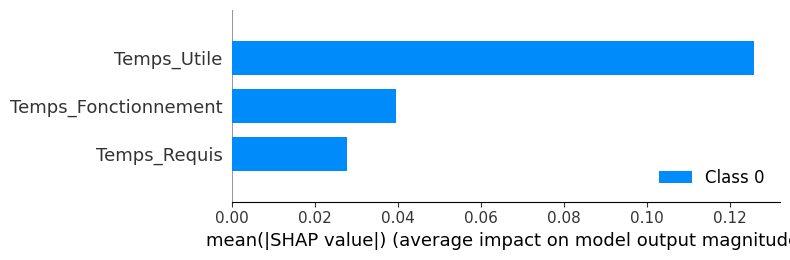

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [48]:
import shap
shap.initjs()

# Créer un explainer SHAP pour le modèle ANN
explainer = shap.KernelExplainer(model.predict, X_train)

# Calculer les valeurs SHAP pour l'ensemble de données
shap_values = explainer.shap_values(X_test)

# Visualisation de l'importance globale des caractéristiques
shap.summary_plot(shap_values, X_test, feature_names=['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile'])

# Visualiser une instance particulière
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile'])


In [80]:
def classify_trs(trs_value):
    if trs_value < 0.15:
        return 0  # Class 0
    elif trs_value < 0.30:
        return 1  # Class 1
    elif trs_value < 0.45:
        return 2  # Class 2
    elif trs_value < 0.60:
        return 3  # Class 3
    else:
        return 4  # Class 4 (covers trs_value >= 0.60)

# Apply classification to the TRS column
df['TRS_Class'] = df['TRS'].apply(classify_trs)

# Prepare features and labels
X = df[['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile']].values
Y = df['TRS_Class'].values

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # First hidden layer
#model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) 
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Second hidden layer
model.add(Dense(7, activation='softmax'))  # Output layer (7 classes)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [87]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=20, validation_split=0.2)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2075 - loss: 2.5462 - val_accuracy: 0.2438 - val_loss: 2.3145
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3181 - loss: 2.1998 - val_accuracy: 0.2438 - val_loss: 2.0470
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.9760 - val_accuracy: 0.2438 - val_loss: 1.8764
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3183 - loss: 1.8037 - val_accuracy: 0.2750 - val_loss: 1.7747
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3908 - loss: 1.7314 - val_accuracy: 0.2438 - val_loss: 1.7121
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3330 - loss: 1.6508 - val_accuracy: 0.3562 - val_loss: 1.6407
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4561 - loss: 1.6087 - val_accuracy: 0.3000 - val_loss: 1.5715
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4146 - loss: 1.5195 - val_accuracy: 0.4375 - 

In [88]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy:.2f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9807 - loss: 0.4398
Test Accuracy: 0.96


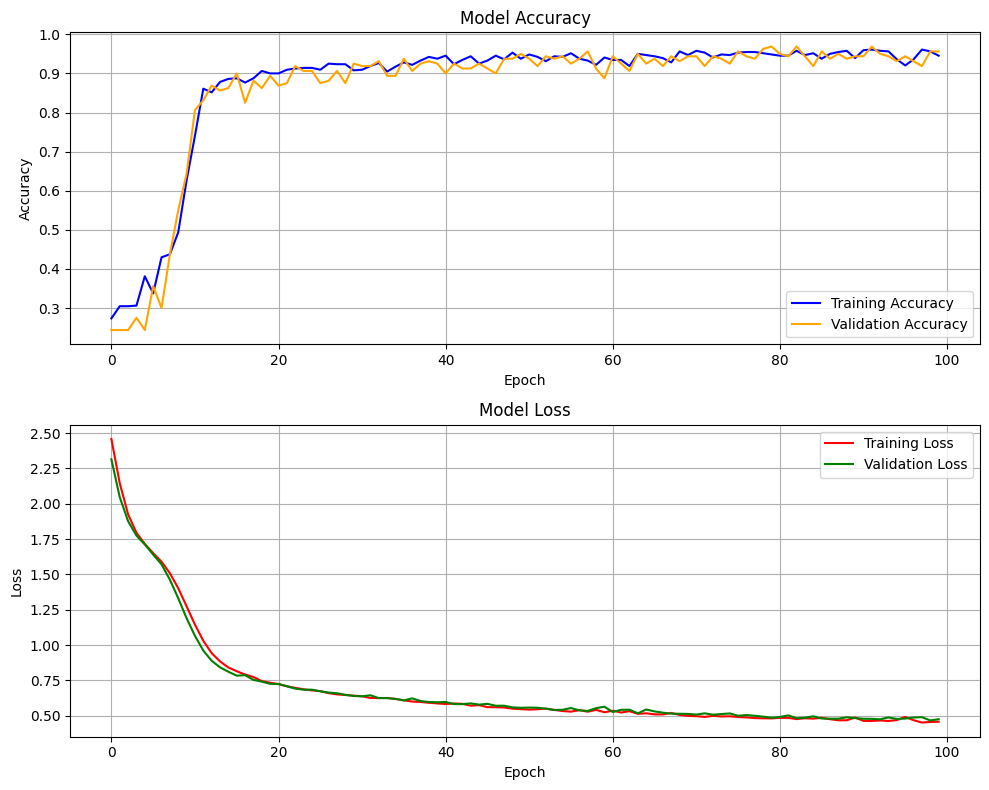

In [90]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax1 = plt.subplots(2, 1, figsize=(10, 8))

# Plot Accuracy
ax1[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax1[0].set_title('Model Accuracy')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_xlabel('Epoch')
ax1[0].legend()
ax1[0].grid()

# Plot Loss
ax1[1].plot(history.history['loss'], label='Training Loss', color='red')
ax1[1].plot(history.history['val_loss'], label='Validation Loss', color='green')
ax1[1].set_title('Model Loss')
ax1[1].set_ylabel('Loss')
ax1[1].set_xlabel('Epoch')
ax1[1].legend()
ax1[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [91]:
correlation_matrix = (df.drop(['Machine'],axis=1)).corr()

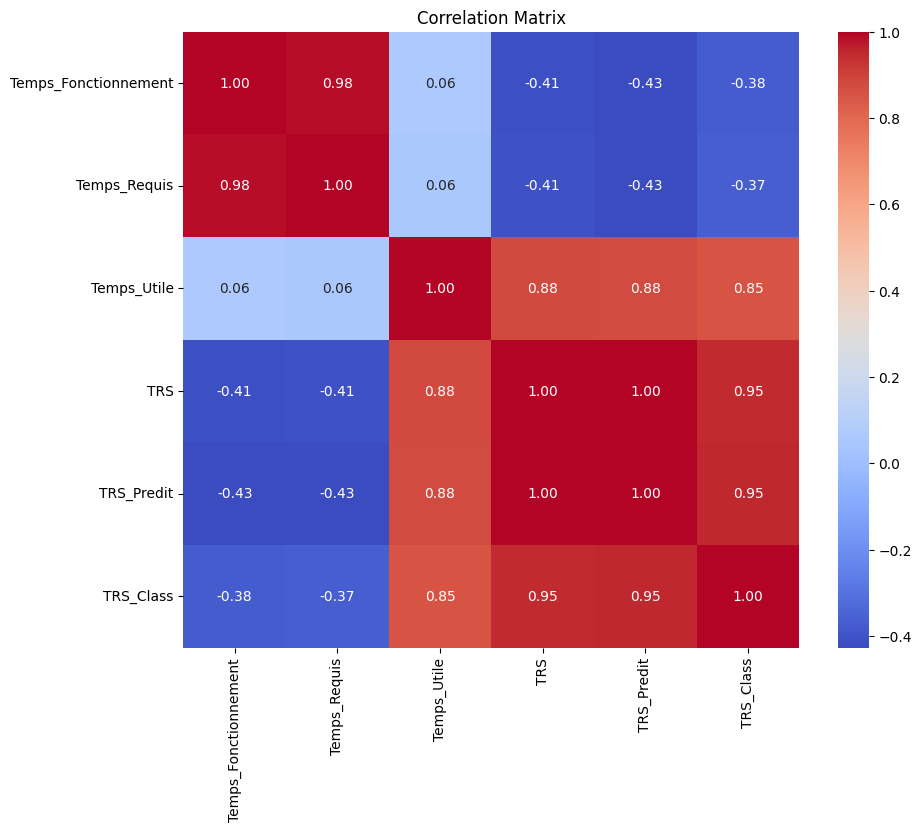

In [92]:
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Comparison of Actual vs Predicted TRS Classes:
    Machine  Actual_TRS_Class  Predicted_TRS_Class
0        M1                 2                    2
1        M2                 3                    3
2        M3                 4                    4
3        M4                 2                    2
4        M1                 2                    2
..      ...               ...                  ...
995      M4                 4                    4
996      M1                 3                    3
997      M2                 4                    4
998      M3                 2                    2
999      M4                 2                    2

[1000 rows x 3 columns]

Best Performing Machine:
Machine       M1
Accuracy    0.96
Name: 0, dtype: object


DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


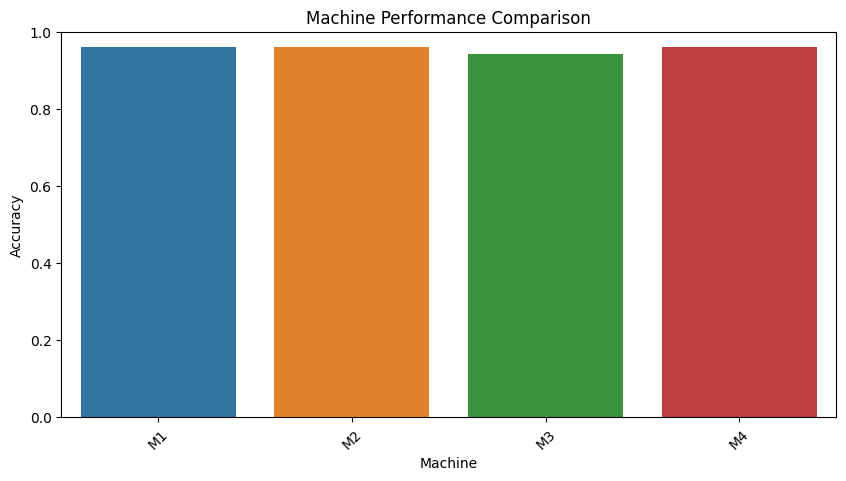

In [93]:
Y_pred_probs = model.predict(X)  # X should contain your feature columns
Y_pred = np.argmax(Y_pred_probs, axis=1)  # Get predicted class labels

# Step 2: Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Machine': df['Machine'],  # Machine names
    'Actual_TRS_Class': Y,      # Actual classes (TRS_Class)
    'Predicted_TRS_Class': Y_pred # Predicted classes
})

# Step 3: Identify the best performing machine
# Group by 'Machine' and calculate the accuracy
performance = comparison_df.groupby('Machine').apply(
    lambda x: (x['Actual_TRS_Class'] == x['Predicted_TRS_Class']).mean()
).reset_index(name='Accuracy')  # Convert to DataFrame

# Find the machine with the best accuracy
best_machine = performance.loc[performance['Accuracy'].idxmax()]

# Display the results
print("Comparison of Actual vs Predicted TRS Classes:")
print(comparison_df)

print("\nBest Performing Machine:")
print(best_machine)

# Optional: Visualize the performance
plt.figure(figsize=(10, 5))
sns.barplot(x='Machine', y='Accuracy', data=performance)
plt.title('Machine Performance Comparison')
plt.xlabel('Machine')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [94]:
import pandas as pd
import numpy as np
from lime import lime_tabular
import random

# Assuming df is your DataFrame and model is already trained
# Add additional features to your dataset as necessary
# For example, let's say you have:
# df['Planned_Downtime'], df['Downtime_Duration'], df['Production_Rate']

# Select a random sample of instances for LIME explanation
sample_indices = random.sample(range(X.shape[0]), 5)  # Select 5 instances

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X,  # Use the training data
    feature_names=['Temps_Fonctionnement', 'Temps_Requis', 'Temps_Utile', 
                   'Planned_Downtime', 'Downtime_Duration', 'Production_Rate'],  # Add relevant features
    class_names=[str(i) for i in range(7)],
    mode='classification'
)

# Generate LIME explanations for the sampled instances
for instance_index in sample_indices:
    exp = explainer.explain_instance(
        data_row=X[instance_index],
        predict_fn=model.predict,
        num_features=6  # Display all relevant features
    )
    exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


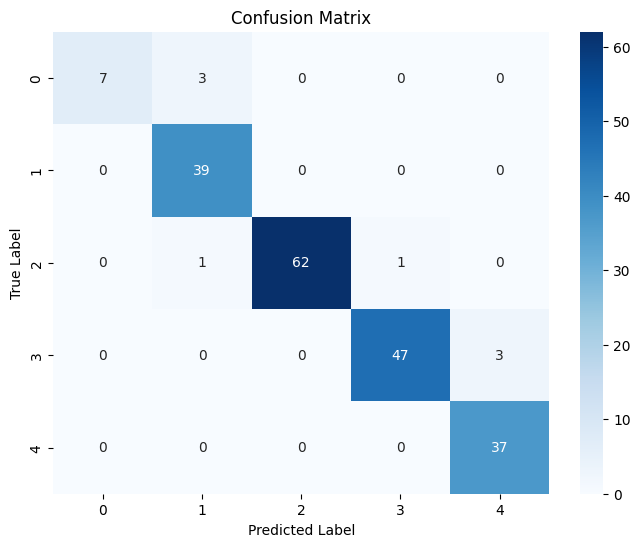

In [95]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the class labels for the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
